# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
results = pd.read_csv('evaluation-data.csv')
results.head()

,actual,prob
0,1.0,0.650790
1,1.0,0.772166
2,1.0,0.647421
3,1.0,0.612818
4,1.0,0.596953


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

# Question 1
- Determine the distribution of the actual event.
- Would you be concern about bias due to imbalance?

In [2]:
# insert code here
results.actual.value_counts()

1.0    3000
0.0    2000
Name: actual, dtype: int64

#### Observation
- There is a noticable difference in the class values. So, we can say there is imbalance. We need to consider evaluation techinques other than accuracy because of this imbalance.

# Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

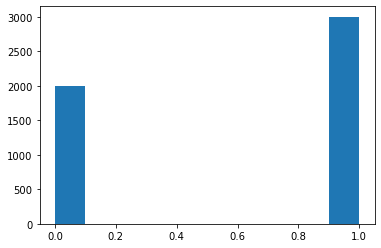

In [3]:
# insert code here
plt.hist(results.actual)
plt.show()

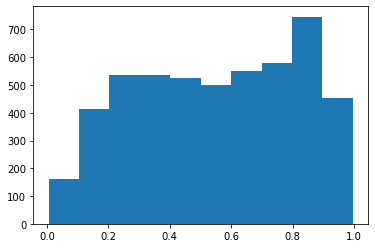

In [4]:
plt.hist(results.prob)
plt.show()

#### Observation
- From the above graph we can see that their are a large number of values with the probabilities in the range of 0.8 and 1.
- The number of probabilities below 0.5 are comparetively less than those with probability greater than 0.5.

# Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [5]:
ls = []
for i in range(len(results.prob)):
    if results.prob.iloc[i] > 0.5:
        ls.append(1)
    else:
        ls.append(0)

In [6]:
results["predicted"] = ls
results.head()

,actual,prob,predicted
0,1.0,0.650790,1
1,1.0,0.772166,1
2,1.0,0.647421,1
3,1.0,0.612818,1
4,1.0,0.596953,1


In [7]:
# select a column as series and then convert it into a column
list_of_actual = results['actual'].to_list()
list_of_predicted = results['predicted'].to_list()

In [8]:
classes = set(list_of_actual)
number_of_classes = len(classes)

conf_matrix = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes, columns=classes)

for true_label, prediction in zip(list_of_actual ,list_of_predicted):
    conf_matrix.loc[true_label, prediction] += 1

print(conf_matrix)

      0.0   1.0
0.0  1790   210
1.0   377  2623


#### Observation
- Their are 1790 observations which are correctly classified as 0.
- Their are 2623 observations which are correctly classified as 1.
- Their are 210 observations which are wrongly classified as 1.
- Their are 377 observations which are wrongly classified as 0.

# Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model?

In [9]:
Accuracy = (1790+2623)/5000*100
Accuracy

88.26

In [10]:
Precision = 2623/(2623+210)*100
Precision

92.58736321920226

In [11]:
Recall = 2623/(2623+377)*100
Recall

87.43333333333332

As the given data is imbalanced I would like to use Recall for this model.

# Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [12]:
y1 = results['prob']
y2 = results['actual']
FPR = []
TPR = []
thresholds = np.arange(0.0, 1.01, 0.5)
P = sum(y2)
N = len(y2) - P
for thresh in thresholds:
    FP=0
    TP=0
    thresh = round(thresh,2)
    for i in range(len(y1)):
        if (y1[i] >= thresh):
            if y2[i] == 1:
                TP = TP + 1
            if y2[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)

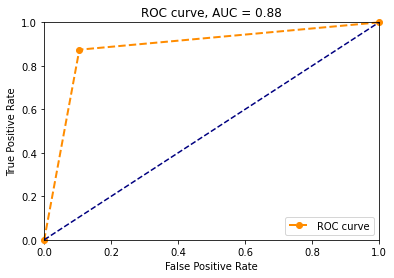

In [13]:
auc = -1 * np.trapz(TPR, FPR)

plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()

#### Observation
- The ROC curve for the given data(Green Line) is moving away from the diagonal which indicates that we are performing a better job at classification than a completely random classifier.
- Our data has an area under curve of .88.